# First Image Processing Lab

In [1]:
!pip install -r ./requirements.txt

In [2]:
import imageio as imio
import matplotlib.pyplot as plt
import cv2
from sys import getsizeof
from PIL import Image
import numpy as np
import os
import seaborn as sns

## Execises 1,2,3,4:

In [3]:
images_paths = ['cameraman.tif', 'onion.png', 'pout.tif', 'football.jpg',
                'saturn.png', 'foggysf2.jpg', 'text.png', 'football_ind.tif']

Filename: cameraman.tif --- Extension: tif
Filesize: 65840
Imagesize: (256, 256)
Type: GrayScale
Extension  .JPG - Filesize: 10717
Extension  .BMP - Filesize: 66614
Extension  .PNG - Filesize: 38629
Extension  .TIF - Filesize: 65840


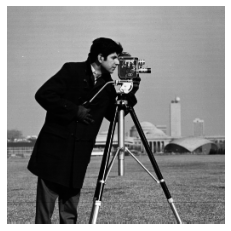



Filename: onion.png --- Extension: png
Filesize: 44610
Imagesize: (135, 198, 3)
Type: RGB
Extension  .JPG - Filesize: 5197
Extension  .BMP - Filesize: 80514
Extension  .PNG - Filesize: 44610
Extension  .TIF - Filesize: 80510


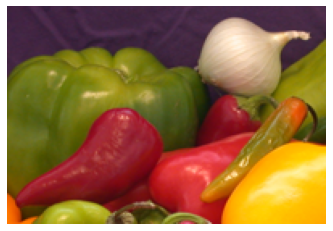



Filename: pout.tif --- Extension: tif
Filesize: 70144
Imagesize: (291, 240)
Type: GrayScale
Extension  .JPG - Filesize: 6548
Extension  .BMP - Filesize: 70918
Extension  .PNG - Filesize: 31684
Extension  .TIF - Filesize: 70144


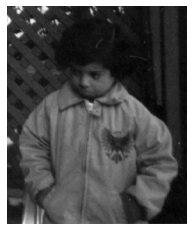



Filename: football.jpg --- Extension: jpg
Filesize: 13147
Imagesize: (256, 320, 3)
Type: RGB
Extension  .JPG - Filesize: 13147
Extension  .BMP - Filesize: 245814
Extension  .PNG - Filesize: 122690
Extension  .TIF - Filesize: 246080


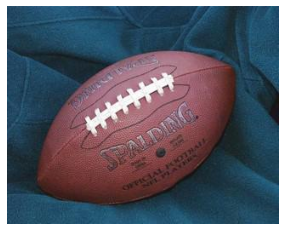



Filename: saturn.png --- Extension: png
Filesize: 1186666
Imagesize: (1500, 1200, 3)
Type: RGB
Extension  .JPG - Filesize: 61293
Extension  .BMP - Filesize: 5400054
Extension  .PNG - Filesize: 1186666
Extension  .TIF - Filesize: 5400320


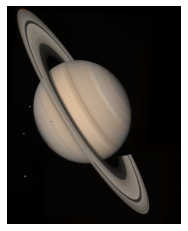



Filename: foggysf2.jpg --- Extension: jpg
Filesize: 364515
Imagesize: (2336, 3504, 3)
Type: RGB
Extension  .JPG - Filesize: 364515
Extension  .BMP - Filesize: 24556086
Extension  .PNG - Filesize: 3437645
Extension  .TIF - Filesize: 24556352


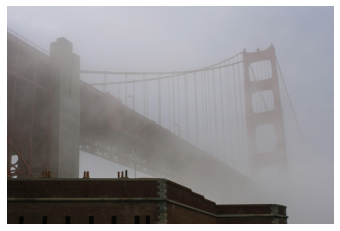



Filename: text.png --- Extension: png
Filesize: 1842
Imagesize: (256, 256)
Type: Binary
Extension  .JPG - Filesize: 10030
Extension  .BMP - Filesize: 66614
Extension  .PNG - Filesize: 1842
Extension  .TIF - Filesize: 65840


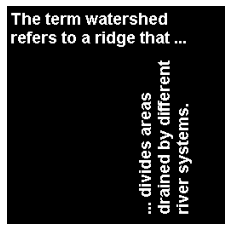



Filename: football_ind.tif --- Extension: tif
Filesize: 83590
Imagesize: (256, 320, 3)
Type: RGB
Extension  .JPG - Filesize: 12860
Extension  .BMP - Filesize: 245814
Extension  .PNG - Filesize: 55156
Extension  .TIF - Filesize: 83590


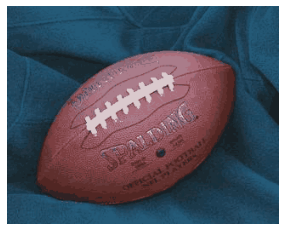

In [4]:
for im_path in images_paths:
    im = cv2.imread(os.path.join('./images/',im_path))
    if len(im.shape)!=2:
        if (im[:,:,0] == im[:,:,1]).all() and (im[:,:,0] == im[:,:,2]).all():
            im = im[:,:,0]
    if len(np.unique(im)) == 2:
        kind = 'Binary'
    elif len(np.unique(im)) > 2 and len(im.shape)==2:
        kind = 'GrayScale'
        cm = 'gray'
    elif len(np.unique(im)) > 2 and len(im.shape)==3:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        kind = 'RGB'
        cm = 'gray'
    else:
        kind = 'Indexed'

    print(f'Filename: {im_path} --- Extension: {im_path.split(".")[1]}')
    print(f'Filesize: {os.path.getsize(os.path.join("./images",im_path))}')
    print(f'Imagesize: {im.shape}')
    print(f'Type: {kind}')
    
    for extension in ['.jpg', '.bmp', '.png', '.tif']:
        if extension == im_path.split(".")[1]:
            continue
        new_name = os.path.join('./images/',f'{im_path.split(".")[0]}{extension}')
        if not os.path.exists(new_name):
            imio.imwrite(new_name, im)
        print(f'Extension  {extension.upper()} - Filesize: {os.path.getsize(new_name)}')
    if cm=='gray':
        plt.imshow(im, cmap = 'gray')
        plt.axis('off')
    else:
        plt.imshow(im, cmap = 'gray')
        plt.axis('off')
    plt.show()
    print()
    print()

## Excercise 4 b and 5

In [5]:
# Generate the indexed color image
im = Image.open("./images/football.jpg")
imP = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=32) # EQUIVALENT TO rgb2ind
# param palette: Palette to use when converting from mode "RGB"
# to "P".  Available palettes are :data:`WEB` or :data:`ADAPTIVE`.

imP.save("./images/football_ind.tif", )

Shape of the image (256, 320)


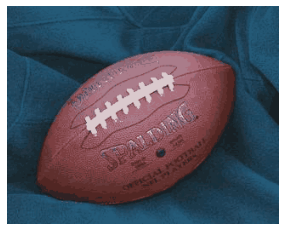

In [6]:
from PIL import Image
b = Image.open('./images/football_ind.tif')
print(f'Shape of the image {np.array(b).shape}')
plt.imshow(b)
plt.axis('off')
plt.show()

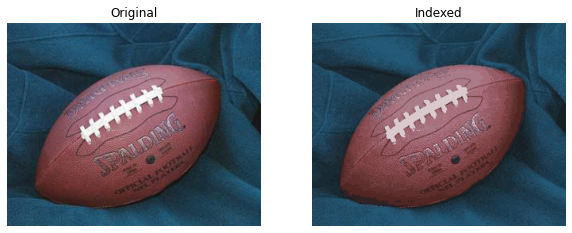

In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Original')
ax[0].imshow(im)
ax[0].axis('off')
ax[1].set_title('Indexed')
ax[1].imshow(imP)
ax[1].axis('off')
plt.show()

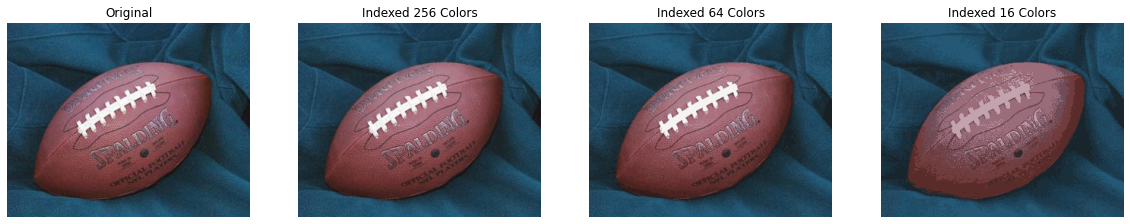

In [8]:
im = Image.open("./images/football.jpg")
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].set_title('Original')
ax[0].imshow(im)
ax[0].axis('off')
for k, i in enumerate([256,64,16],1):
    imP = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=i)
    ax[k].set_title(f'Indexed {i} Colors')
    ax[k].imshow(imP)
    ax[k].axis('off')
plt.show()

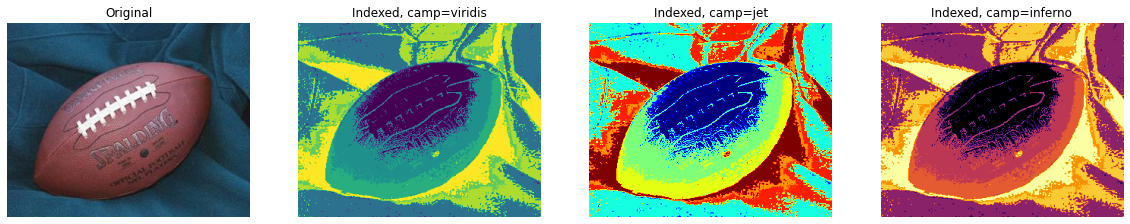

In [9]:
# Generate the indexed color image
im = Image.open("./images/football.jpg")
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].set_title('Original')
ax[0].imshow(im)
ax[0].axis('off')
for k, i in enumerate(['viridis','jet','inferno'],1):
    imP = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=9)
    ax[k].set_title(f'Indexed, camp={i}')
    ax[k].imshow(np.array(imP), cmap=i)
    ax[k].axis('off')
plt.show()

##### Trying with "corn" image

Shape of the image (508, 492)


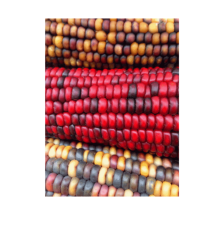

In [10]:
a = Image.open('./images/corn.png')
print(f'Shape of the image {np.array(a).shape}')
plt.imshow(a)
plt.axis('off')
plt.show()

In [11]:
a.getpalette()[:10]

[255, 255, 255, 88, 33, 14, 111, 6, 16, 147]

# Part 2

#### Exercise 1

In [12]:
# Imadjust
def gamma_func(
    img: np.ndarray, low_out: int, high_out: int, gamma: float,
    low_in: int = None, high_in: int = None
):
    """
    Apply a gamma function (contrast modification) to the given gray-scale image.
    Args:
        img (np.ndarray): image to be processed, gray scale only (one channel).
        low_in (int): lower value in the input image (if it is not 
            provided it will be calculated)
        high_in (int): higher value in the input image (if it is 
            not provided it will be calculated)
        low_out (int): lower value desired in the output image. 
        high_out (int): higher value desired in the output image.
        gamma (float): gamma value to be used in the transformation.
    Returns:
        Porcessed image
    """
    if low_in is None:
        low_in = np.min(img)
    if high_in is None:
        high_in = np.max(img)
    img = (((img - low_in) / (high_in - low_in)) ** (1/gamma)) * \
        (high_out - low_out) + low_out
    img = img.astype('int')
    img[img<=low_out] = low_out
    img[img>high_out] = high_out
    return img

def gamma_func_lut(
    img: np.ndarray, low_out: int, high_out: int, gamma: float,
    low_in: int = None, high_in: int = None, full_uint_range: int = False
):
    """
    If full_uint_range == True, then it will get the lut table from the range 0-255,
    if full_uint_range == False, it will return the lut table only for present values 
    in the image.
    Args:
        img (np.ndarray): image to be processed, gray scale only (one channel).
        low_in (int): lower value in the input image (if it is not 
            provided it will be calculated)
        high_in (int): higher value in the input image (if it is 
            not provided it will be calculated)
        low_out (int): lower value desired in the output image. 
        high_out (int): higher value desired in the output image.
        gamma (float): gamma value to be used in the transformation.
        full_uint_range (int): whether to use the 0-255 range of ints (True)
            or to extract values present in the image. Default False.
    Returns:
        (np.ndarray) : array of [2xn] in the first row the input intensity value 
            in the seccond row the transformed intensity value.
    """
    
    if full_uint_range:
        in_vect = np.arange(256)
    else:
        in_vect = np.unique(img.flatten(), return_counts=False)
    if low_in is None:
        low_in = np.min(in_vect)
    if high_in is None:
        high_in = np.max(in_vect)
    out_vect = (((in_vect - low_in) / (high_in - low_in)) ** (1/gamma)) * \
        (high_out - low_out) + low_out
    out_vect = out_vect.astype('int')
    out_vect[out_vect<=low_out] = low_out
    out_vect[out_vect>high_out] = high_out
    return np.array([in_vect, out_vect])

def imadjust(
    img: np.ndarray, low_in: int = None, high_in: int = None, 
    low_out: int = 0, high_out: int = 255, gamma: float = 1.
):
    """
    Apply a gamma function (contrast modification) to the given image, 
    the image can be gray-scale or rgb.
    Args:
        img (np.ndarray): image to be processed.
        low_in (int): lower value in the input image (if it is not 
            provided it will be calculated)
        high_in (int): higher value in the input image (if it is 
            not provided it will be calculated)
        low_out (int): lower value desired in the output image. Default 0
        high_out (int): higher value desired in the output image. Default 255
        gamma (float): gamma value to be used in the transformation. Default 1.
    Returns:
        Porcessed image
    """
    if len(img.shape) != 2:
        for i in range(3):
            img[:,:,i] = gamma_func(img[:,:,i], low_out, high_out, gamma, low_in, high_in)
    else:
        img = gamma_func(img, low_out, high_out, gamma, low_in, high_in)
    return img

##### For a gray-scale image

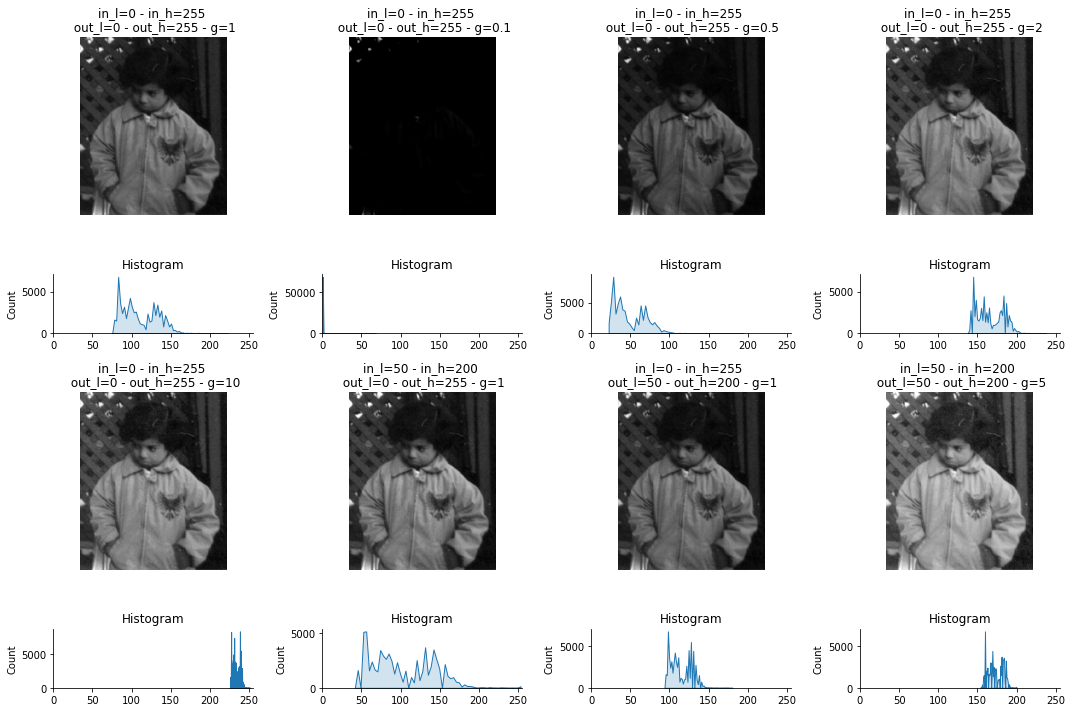

In [13]:
im = cv2.imread('./images/pout.tif', cv2.IMREAD_GRAYSCALE)
settings = [
    [0,255,0,255,1],
    [0,255,0,255,0.1],
    [0,255,0,255,0.5],
    [0,255,0,255,2],
    [0,255,0,255,10],
    [50,200,0,255,1],
    [0,255,50,200,1],
    [50,200,50,200,5]
]
fig, ax = plt.subplots(4,4, figsize=(15,10), gridspec_kw={'height_ratios': [3, 1, 3, 1]})
for k,sett in enumerate(settings):
    k1, k2 = [(k//4)*2,k%4]
    ax[k1, k2].set_title(
        f'in_l={sett[0]} - in_h={sett[1]} \n out_l={sett[2]} - out_h={sett[3]} - g={sett[4]}'
    )
    im_ad = imadjust(im, *sett)
    ax[k1, k2].imshow(im_ad, cmap='gray')
    ax[k1, k2].axis('off')
    ax[k1+1, k2].set_title('Histogram')
    sns.histplot(im_ad.flatten(), ax=ax[k1+1, k2], bins=60, element='poly', alpha=0.2)
    ax[k1+1, k2].set_xlim([0,255])
    sns.despine(ax=ax[k1+1, k2])
plt.tight_layout()

##### For a color image

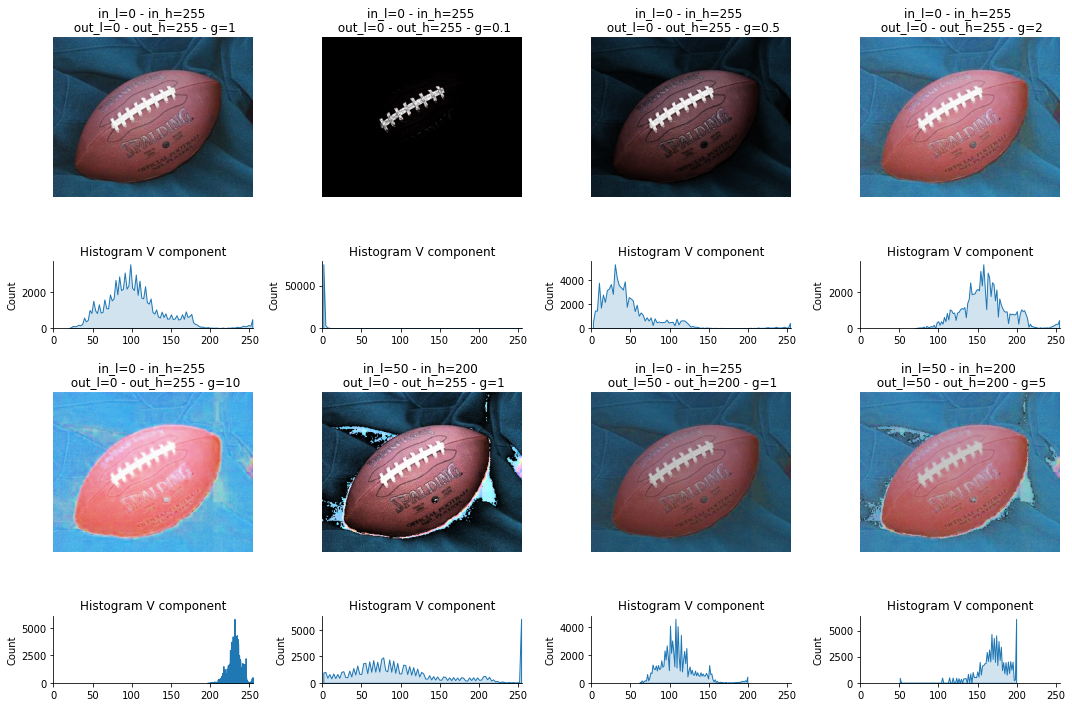

In [14]:
im = cv2.imread('./images/football.tif')
fig, ax = plt.subplots(4,4, figsize=(15,10), gridspec_kw={'height_ratios': [3, 1, 3, 1]})
for k,sett in enumerate(settings):
    k1, k2 = [(k//4)*2,k%4]
    ax[k1, k2].set_title(
        f'in_l={sett[0]} - in_h={sett[1]} \n out_l={sett[2]} - out_h={sett[3]} - g={sett[4]}'
    )
    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    im_hsv[:,:, 2] = imadjust(im_hsv[:,:,2], *sett)
    im_rgb = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB)
    ax[k1, k2].imshow(im_rgb)
    ax[k1, k2].axis('off')
    ax[k1+1, k2].set_title('Histogram V component')
    sns.histplot(im_hsv[:,:, 2].flatten(), ax=ax[k1+1, k2], bins=100, element='poly', alpha=0.2)
    ax[k1+1, k2].set_xlim([0,255])
    sns.despine(ax=ax[k1+1, k2])
plt.tight_layout()

#### Excercise 2

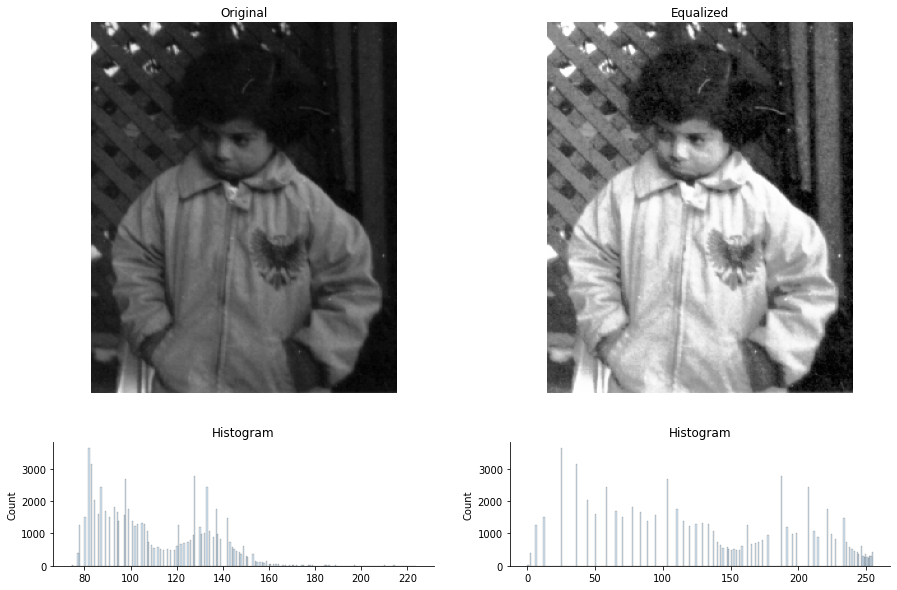

In [15]:
im = cv2.imread('./images/pout.tif', cv2.IMREAD_GRAYSCALE)
im_eq = cv2.equalizeHist(im)

fig, ax = plt.subplots(2,2, figsize=(15,10), gridspec_kw={'height_ratios': [3, 1]})
ax[0,0].set_title('Original')
ax[0,0].imshow(im, cmap='gray')
ax[0,0].axis('off')
ax[1,0].set_title('Histogram')
sns.histplot(im.flatten(), ax=ax[1,0], bins=255, element='bars', alpha=0.2)
sns.despine(ax=ax[1,0])

ax[0,1].set_title('Equalized')
ax[0,1].imshow(im_eq, cmap='gray')
ax[0,1].axis('off')
ax[1,1].set_title('Histogram')
sns.histplot(im_eq.flatten(), ax=ax[1,1], bins=255, element='bars', alpha=0.2)
sns.despine(ax=ax[1,1])
plt.show()

#### Excercise 3

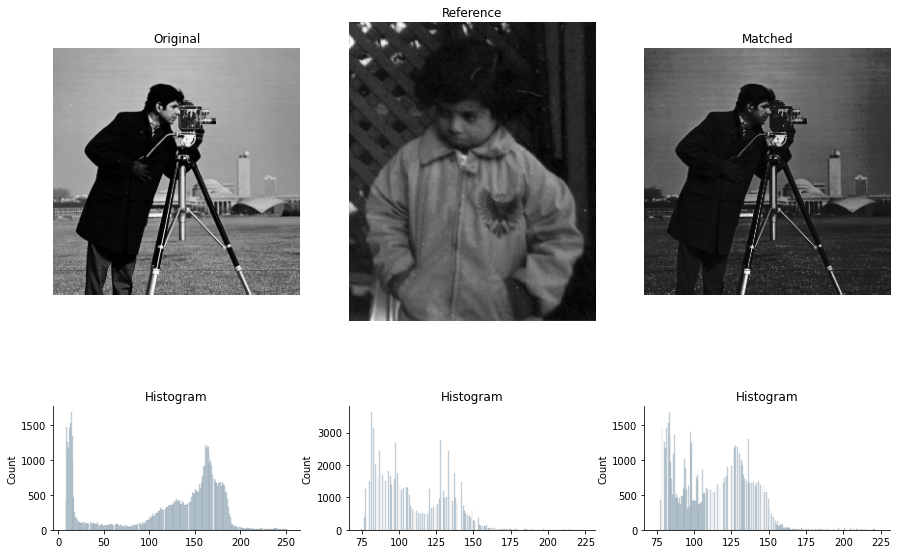

In [16]:
from skimage.exposure import match_histograms

im_r = cv2.imread('./images/pout.tif', cv2.IMREAD_GRAYSCALE)
im_o = cv2.imread('./images/cameraman.tif', cv2.IMREAD_GRAYSCALE)

matched = match_histograms(im_o, im_r)

fig, ax = plt.subplots(2, 3, figsize=(15,10), gridspec_kw={'height_ratios': [3, 1]})
ax[0,0].set_title('Original')
ax[0,0].imshow(im_o, cmap='gray')
ax[0,0].axis('off')
ax[1,0].set_title('Histogram')
sns.histplot(im_o.flatten(), ax=ax[1,0], bins=255, element='bars', alpha=0.2)
sns.despine(ax=ax[1,0])

ax[0,1].set_title('Reference')
ax[0,1].imshow(im_r, cmap='gray')
ax[0,1].axis('off')
ax[1,1].set_title('Histogram')
sns.histplot(im_r.flatten(), ax=ax[1,1], bins=255, element='bars', alpha=0.2)
sns.despine(ax=ax[1,1])

ax[0,2].set_title('Matched')
ax[0,2].imshow(matched, cmap='gray')
ax[0,2].axis('off')
ax[1,2].set_title('Histogram')
sns.histplot(matched.flatten(), ax=ax[1,2], bins=255, element='bars', alpha=0.2)
sns.despine(ax=ax[1,2])
plt.show()

#### Excercise 4

<ipython-input-12-92d97ca9cfcf>:63: RuntimeWarning: invalid value encountered in power
  out_vect = (((in_vect - low_in) / (high_in - low_in)) ** (1/gamma)) * \


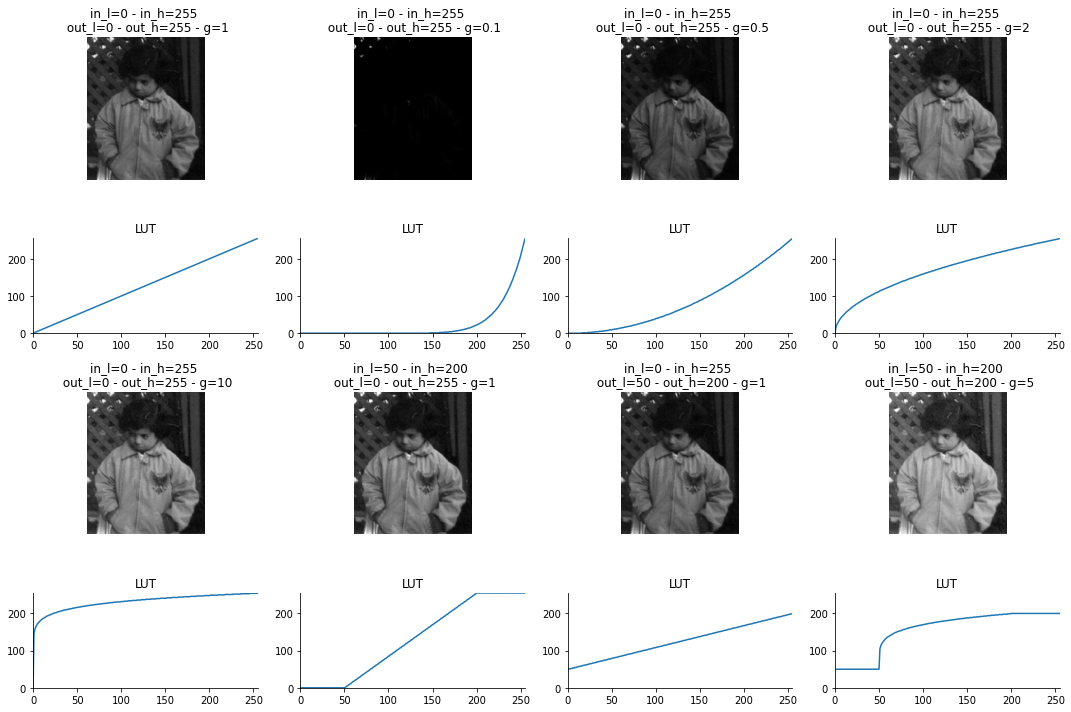

In [17]:
im = cv2.imread('./images/pout.tif', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(4,4, figsize=(15,10), gridspec_kw={'height_ratios': [3, 2, 3, 2]})
for k,sett in enumerate(settings):
    k1, k2 = [(k//4)*2,k%4]
    ax[k1, k2].set_title(
        f'in_l={sett[0]} - in_h={sett[1]} \n out_l={sett[2]} - out_h={sett[3]} - g={sett[4]}'
    )
    im_ad = imadjust(im, *sett)
    im_lut = gamma_func_lut(im, *sett[2:], *sett[:2], True)
    ax[k1, k2].imshow(im_ad, cmap='gray')
    ax[k1, k2].axis('off')
    ax[k1+1, k2].set_title('LUT')
    ax[k1+1, k2].plot(im_lut[0,:], im_lut[1,:])
    ax[k1+1, k2].set_xlim([0,255])
    ax[k1+1, k2].set_ylim([0,255])
    sns.despine(ax=ax[k1+1, k2])
#     for m, i in enumerate(['r','g','b']):
#         sns.histplot(im[:,:,m].flatten(), ax=ax[k1+1, k2], bins=30, element='poly', alpha=0.2)
plt.tight_layout()

#### Excercise 5